# Series of experiments performed with ibab implementation of wavenet

## Input data

Import and plot input data

In [25]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

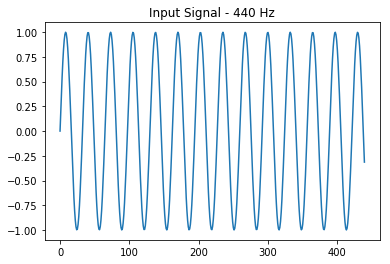

In [26]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import librosa, librosa.display
signal = wavfile.read('corpus/oneSin/sinus16000.wav')
signal = signal[1]
plt.figure(1)
plt.title('Input Signal - 440 Hz')
reduced = signal[:440]
plt.plot(reduced)
plt.show()

In this first  experiment we used the recommendations from the paper. That means 5 stacked layers with 10 dilation layers per stack. That give a receptive field of **5116**.

`receptive_field = (filter_width - 1) * sum(dilations) + 1`
 
 where 
 
 `filter_width = 2`
 
 `dilations = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
	           1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
               1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
               1, 2, 4, 8, 16, 32, 64, 128, 256, 512,
               1, 2, 4, 8, 16, 32, 64, 128, 256, 512]`
               
100 epoch were used.

## Reducing wavenet

First experiments consisted of sinusoidal signal input with sample rate 16000 Hz and frequency 440 Hz. Some of the parameters have been modified in order to reduce the complexity and the computational cost of the network.

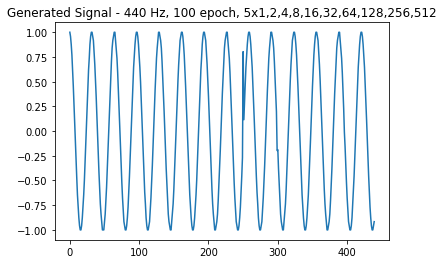

In [27]:
signal = wavfile.read('generatedSignals/longSin.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

Reducing the quantization give the following results:

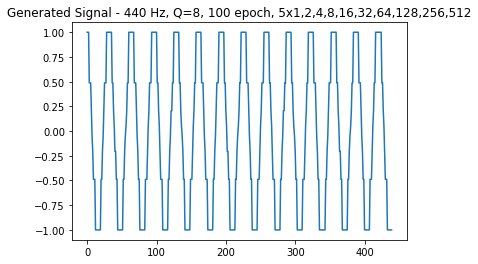

In [28]:
signal = wavfile.read('generatedSignals/quantization8.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=8, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

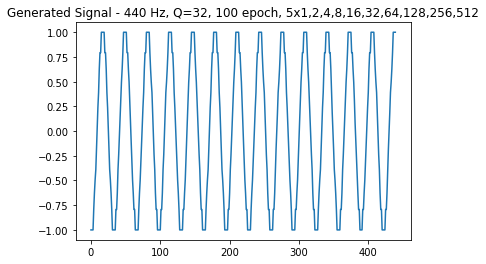

In [29]:
signal = wavfile.read('generatedSignals/quantization32.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=32, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

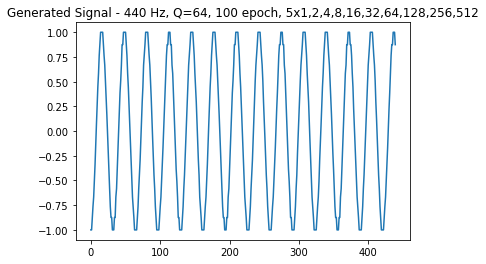

In [30]:
signal = wavfile.read('generatedSignals/quantization64.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=64, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

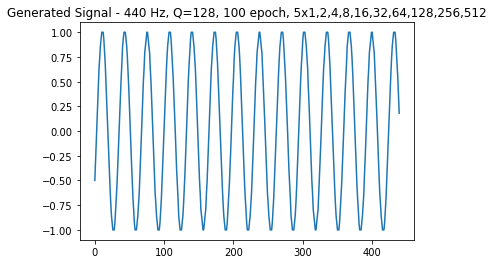

In [31]:
signal = wavfile.read('generatedSignals/quantization128.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=128, 100 epoch, 5x1,2,4,8,16,32,64,128,256,512')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

Changing the quantization to **128** good results are achieved. Now, the number of layers will be decreased.

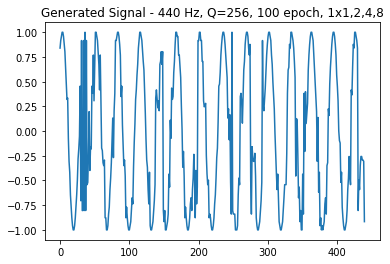

In [32]:
signal = wavfile.read('generatedSignals/dilations1x1248.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=256, 100 epoch, 1x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

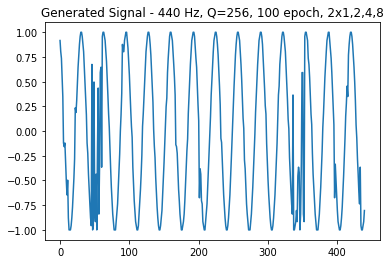

In [33]:
signal = wavfile.read('generatedSignals/dilations2x1248.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=256, 100 epoch, 2x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

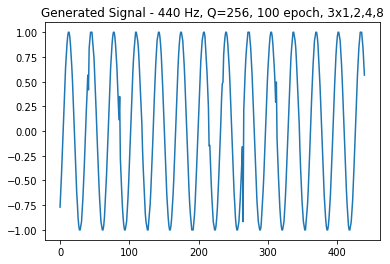

In [34]:
signal = wavfile.read('generatedSignals/dilations3x1248.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=256, 100 epoch, 3x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

Finally a combination of the best results obtained with reducing the number stacked layers and the quantization steps is presented. Q = 128 and dilations = 3x[1,2,4,8]. The receptive field is equal to 47. This configuration will be used during the following experiments.

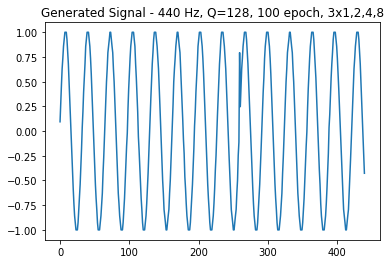

In [35]:
signal = wavfile.read('generatedSignals/dilations3x1248q128.wav')
signal = signal[1]
plt.title('Generated Signal - 440 Hz, Q=128, 100 epoch, 3x1,2,4,8')
reduced = signal[-440:]
plt.plot(reduced)
plt.show()

## Conditionality

In the original paper conditionality is used to control the speaker or the speech. Let's see how it behaves with different sinusoidal signals.

### Two frequencies

First we'll use two signals named sinus1.wav and sinus2.wav with frequencies 440Hz and 493.88

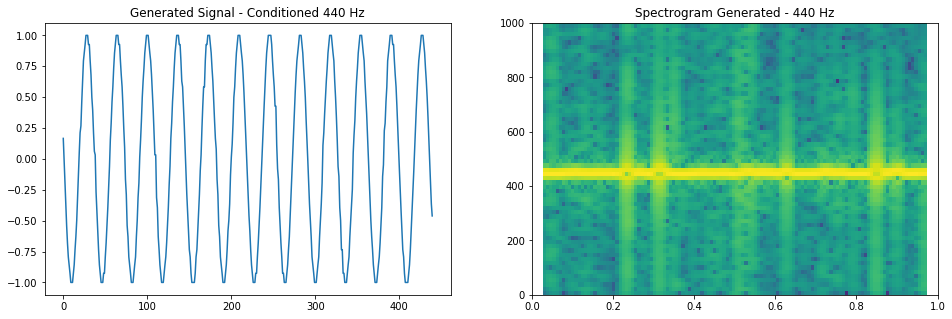

In [82]:
signal = wavfile.read('generatedSignals/consin1.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 440 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 440 Hz')
plt.axis([0,1,0,1000]);

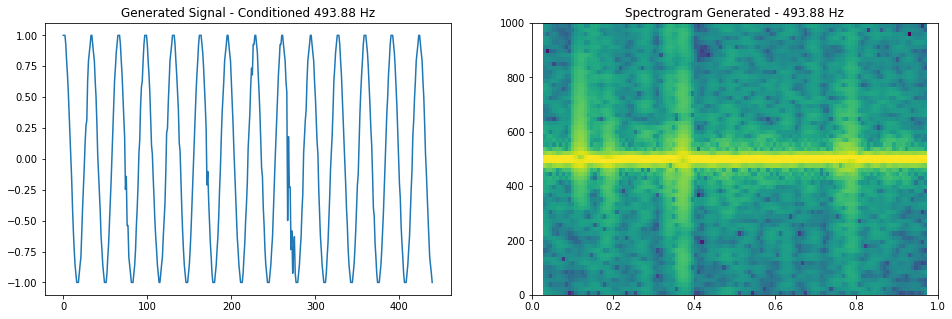

In [80]:
signal = wavfile.read('generatedSignals/consin2.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 493.88 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 493.88 Hz')
plt.axis([0,1,0,1000]);

### One Scale

Now, the system was conditioned to learn one scale. That means that we conditioned that with 7 categories.
The frequencies used were:

`f = [440, 493.88, 523.25, 587.33, 659.25, 698.46, 783.99] #array of frequencies`

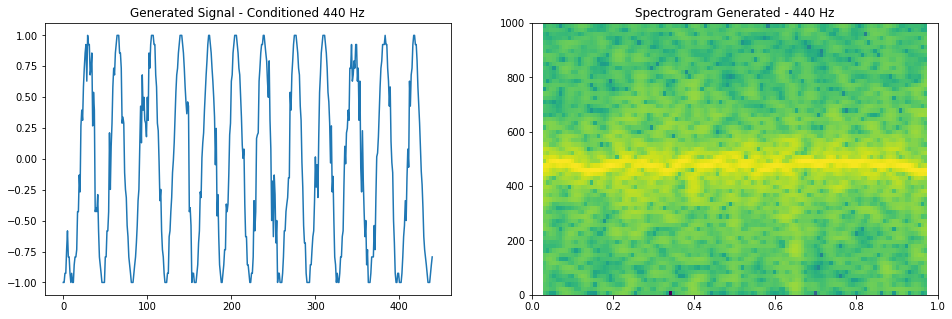

In [81]:
signal = wavfile.read('generatedSignals/scaleSin0.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 440 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 440 Hz')
plt.axis([0,1,0,1000]);

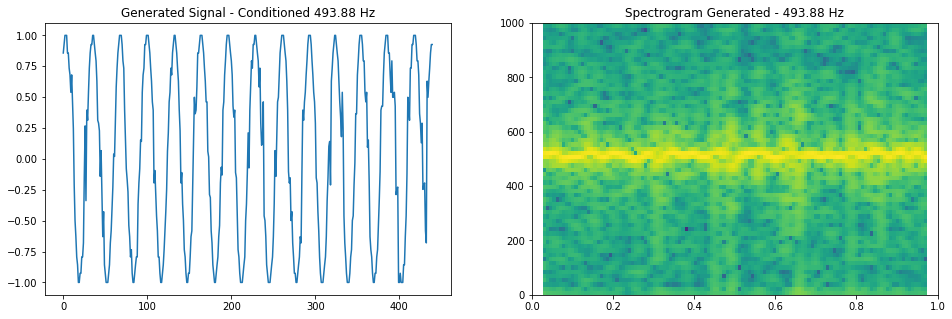

In [83]:
signal = wavfile.read('generatedSignals/scaleSin1.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 493.88 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 493.88 Hz')
plt.axis([0,1,0,1000]);

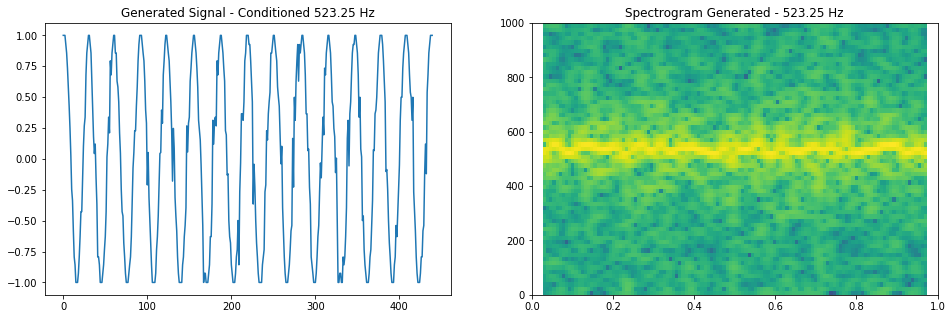

In [84]:
signal = wavfile.read('generatedSignals/scaleSin2.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 523.25 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 523.25 Hz')
plt.axis([0,1,0,1000]);

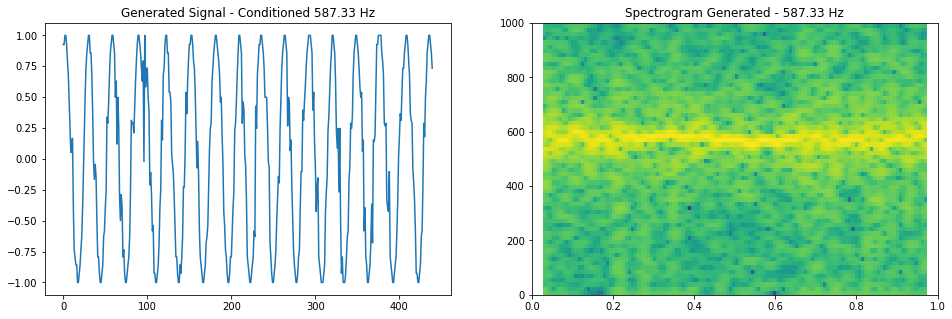

In [85]:
signal = wavfile.read('generatedSignals/scaleSin3.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 587.33 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 587.33 Hz')
plt.axis([0,1,0,1000]);

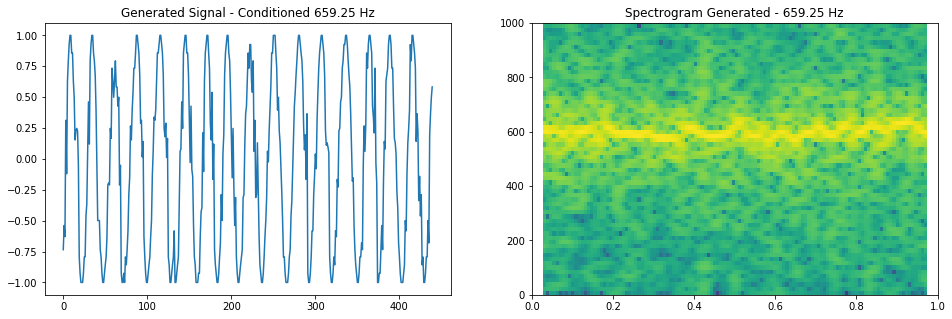

In [86]:
signal = wavfile.read('generatedSignals/scaleSin4.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 659.25 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 659.25 Hz')
plt.axis([0,1,0,1000]);

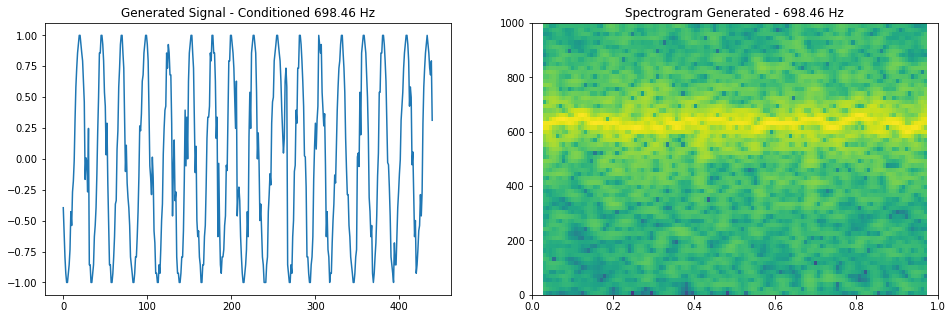

In [87]:
signal = wavfile.read('generatedSignals/scaleSin5.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 698.46 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 698.46 Hz')
plt.axis([0,1,0,1000]);

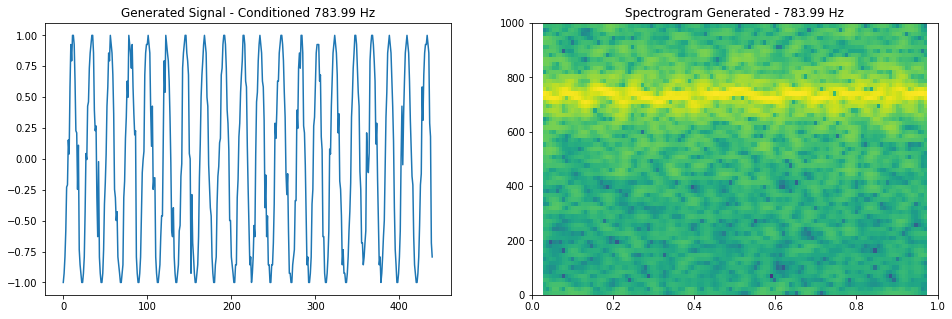

In [120]:
signal = wavfile.read('generatedSignals/scaleSin6.wav')
signal = signal[1]
reduced = signal[-440:]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
ax1.plot(reduced); ax1.set_title('Generated Signal - Conditioned 783.99 Hz')
NFFT = 1024; Fs = 16000;
ax2.specgram(signal, NFFT=NFFT, Fs=Fs, noverlap=900);
ax2.set_title('Spectrogram Generated - 783.99 Hz')
plt.axis([0,1,0,1000]);

As we can see the system is able to learn all the frequencies. However, more noise is added than before. This could be solved increasing the number of epochs, or increasing the complexity of the network.

### Changing shape, frequency and amplitude

Following experiments analyze the behaviour of the network with a training dataset consisted in different shapes, frequencies and amplitudes.

#### Different Amplitudes

Here we conditioned wavenet with four different amplitudes (0.25, 0.5, 0.75,1). Each amplitude is a category. 100 epoch was not enough, but increasing the number of epoch clearly increases the generated file. I used 250 epoch. From here we can see that wavenet is able to learn the amplitudes.

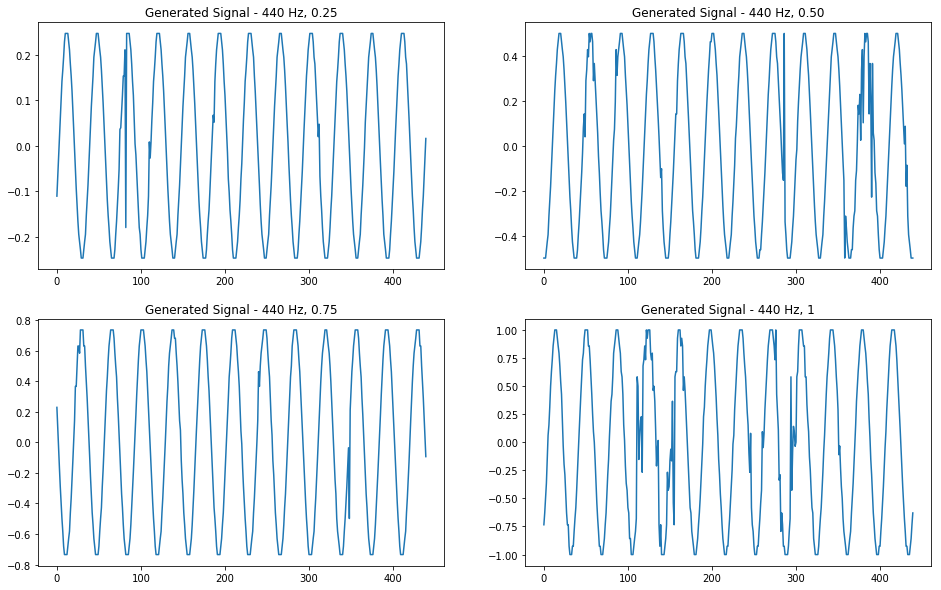

In [130]:
signal0 = wavfile.read('generatedSignals/amp0.wav')
signal0 = signal0[1]
reduced0 = signal0[-440:]
signal1 = wavfile.read('generatedSignals/amp1.wav')
signal1 = signal1[1]
reduced1 = signal1[-440:]
signal2 = wavfile.read('generatedSignals/amp2.wav')
signal2 = signal2[1]
reduced2 = signal2[-440:]
signal3 = wavfile.read('generatedSignals/amp3.wav')
signal3 = signal3[1]
reduced3 = signal3[-440:]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(16,10) )
ax1.plot(reduced0); ax1.set_title('Generated Signal - 440 Hz, 0.25')
ax2.plot(reduced1); ax2.set_title('Generated Signal - 440 Hz, 0.50')
ax3.plot(reduced2); ax3.set_title('Generated Signal - 440 Hz, 0.75')
ax4.plot(reduced3); ax4.set_title('Generated Signal - 440 Hz, 1');

#### Different Shapes

Here we trained wavenet with 2 different frequencies 440Hz and 880 Hz. With three different shapes of waveforms (sinusoidal, square, and sawtooth). The hypothesis is that wavenet will learn f0. 260 epoch gives poor results.

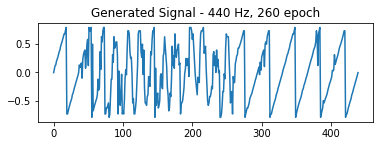

In [22]:
signal = wavfile.read('generatedSignals/shape440.wav')
signal = signal[1]
reduced = signal[-440:]
plt.subplot(2, 1, 1)
plt.title('Generated Signal - 440 Hz, 260 epoch')
plt.plot(reduced)
plt.show()

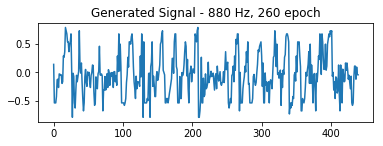

In [21]:
signal = wavfile.read('generatedSignals/shape880.wav')
signal = signal[1]
reduced = signal[-440:]
plt.subplot(2, 1, 1)
plt.title('Generated Signal - 880 Hz, 260 epoch')
plt.plot(reduced)
plt.show()

1000 epoch

In [ ]:
signal = wavfile.read('generatedSignals/shape440_1000.wav')
signal = signal[1]
reduced = signal[-440:]
plt.subplot(2, 1, 1)
plt.title('Generated Signal - 440 Hz, 260 epoch')
plt.plot(reduced)
plt.show()

In [ ]:
signal = wavfile.read('generatedSignals/shape880_1000.wav')
signal = signal[1]
reduced = signal[-440:]
plt.subplot(2, 1, 1)
plt.title('Generated Signal - 880 Hz, 260 epoch')
plt.plot(reduced)
plt.show()

### Real sounds

Bunch of experiments with two different real instruments

## Local Conditioning